<a href="https://colab.research.google.com/github/ibrahimmhammed/Recommendation-system/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries**

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')


## **Reading Files**

In [251]:
df = pd.read_csv('//content//movies.csv')

# **Data Exploration**

In [252]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [253]:
df.shape

(4803, 24)

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [255]:
df.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [256]:
df.describe(include="O") #describe for categorical data

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,cast,crew,director
count,4775,1712,4391,4803,4803,4800,4803,4803,4802,4803,4803,3959,4803,4760,4803,4773
unique,1168,1691,4219,37,4801,4800,3697,469,3280,544,3,3944,4800,4741,4776,2349
top,Drama,http://www.missionimpossible.com/,independent film,en,Out of the Blue,"In the 22nd century, a paraplegic Marine is di...",[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host,William Shatner Leonard Nimoy DeForest Kelley ...,[],Steven Spielberg
freq,370,4,55,4505,2,1,351,2977,10,3171,4795,3,2,6,28,27


In [257]:
df.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

# **Data Analysis**

**1) Top production Countries**

Making a special df to showing country name in a better look

In [258]:
from ast import literal_eval
df['production_countries'] = df['production_countries'].apply(literal_eval)

countries_list = []
for countries in df['production_countries']:
    country_names = [country['name'] for country in countries]
    countries_list.append({'countries': country_names, 'movie_count': len(country_names)})

new_df = pd.DataFrame(countries_list)

country_counts = new_df.explode('countries')['countries'].value_counts()

print(country_counts)

United States of America    3956
United Kingdom               636
Germany                      324
France                       306
Canada                       261
                            ... 
Monaco                         1
Fiji                           1
Serbia and Montenegro          1
Turkey                         1
Kenya                          1
Name: countries, Length: 88, dtype: int64


In [259]:
top10countries = country_counts.nlargest(10)
top10countries

United States of America    3956
United Kingdom               636
Germany                      324
France                       306
Canada                       261
Australia                    110
Italy                         72
Spain                         71
China                         59
Japan                         58
Name: countries, dtype: int64

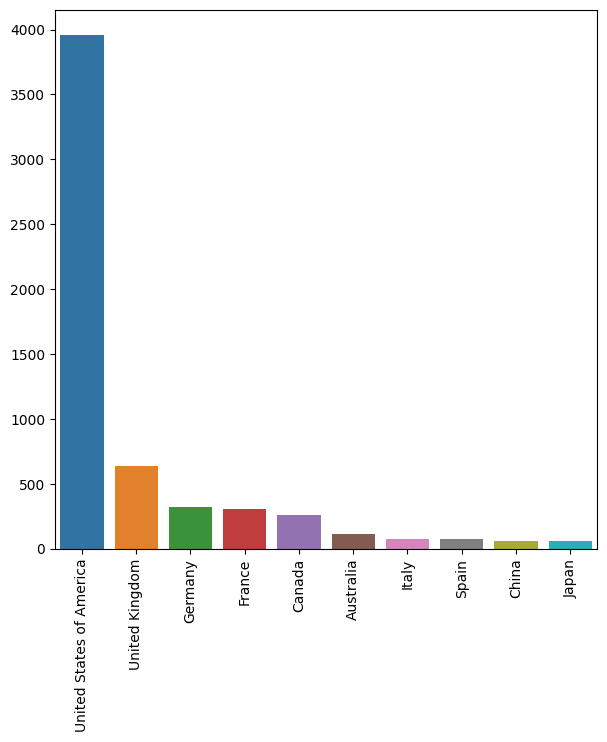

In [260]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
sns.barplot(data=df,
            x=top10countries.index,
            y=top10countries.values)
plt.show()

**2) Top original language**

In [261]:
top10language= df['original_language'].value_counts().nlargest(10)
top10language

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
Name: original_language, dtype: int64

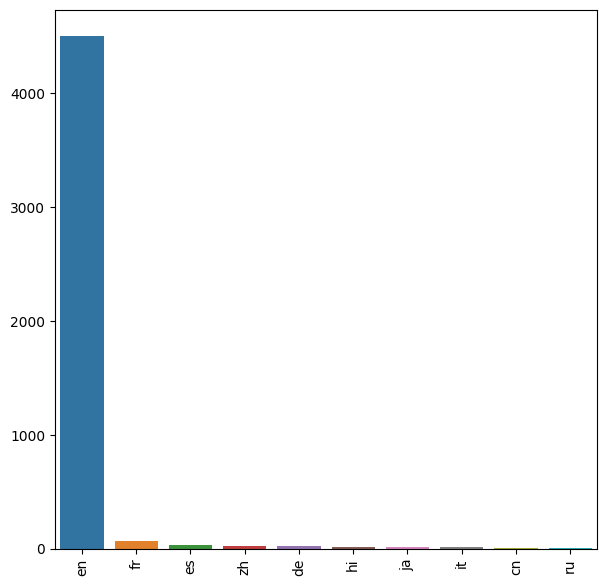

In [262]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
sns.barplot(data=df,
            x=top10language.index,
            y=top10language.values)
plt.show()

**3) Directors who have most movies**

In [263]:
top10dir = df['director'].value_counts().nlargest(10)
top10dir

Steven Spielberg     27
Woody Allen          21
Martin Scorsese      20
Clint Eastwood       20
Ridley Scott         16
Spike Lee            16
Robert Rodriguez     16
Steven Soderbergh    15
Renny Harlin         15
Oliver Stone         14
Name: director, dtype: int64

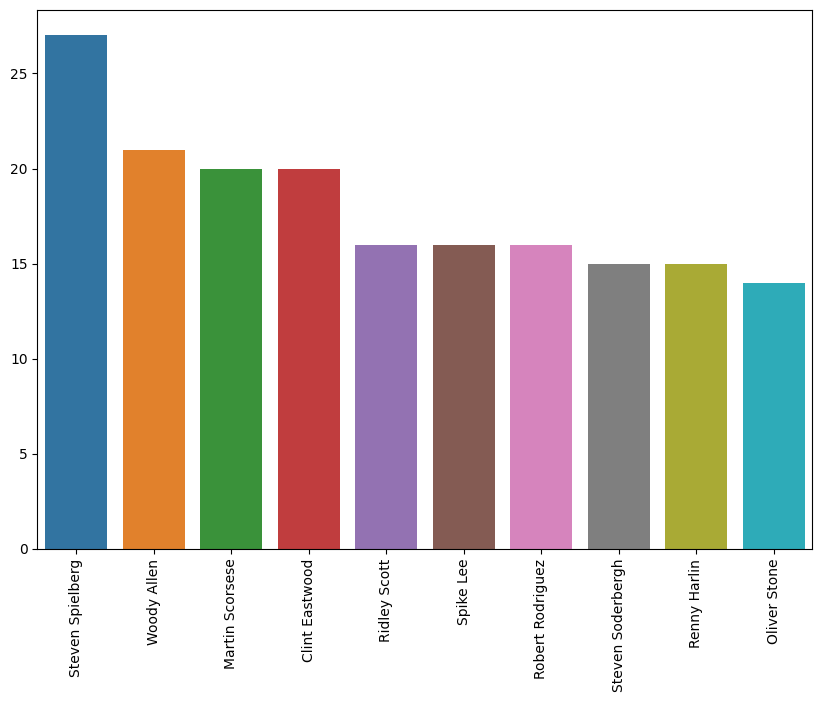

In [264]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,
            x=top10dir.index,
            y=top10dir.values)
plt.show()

**4) Top genres**

In [265]:
top10genres= df['genres'].value_counts().nlargest(10)
top10genres

Drama                   370
Comedy                  282
Drama Romance           164
Comedy Romance          144
Comedy Drama            142
Comedy Drama Romance    109
Horror Thriller          88
Documentary              68
Horror                   64
Drama Thriller           62
Name: genres, dtype: int64

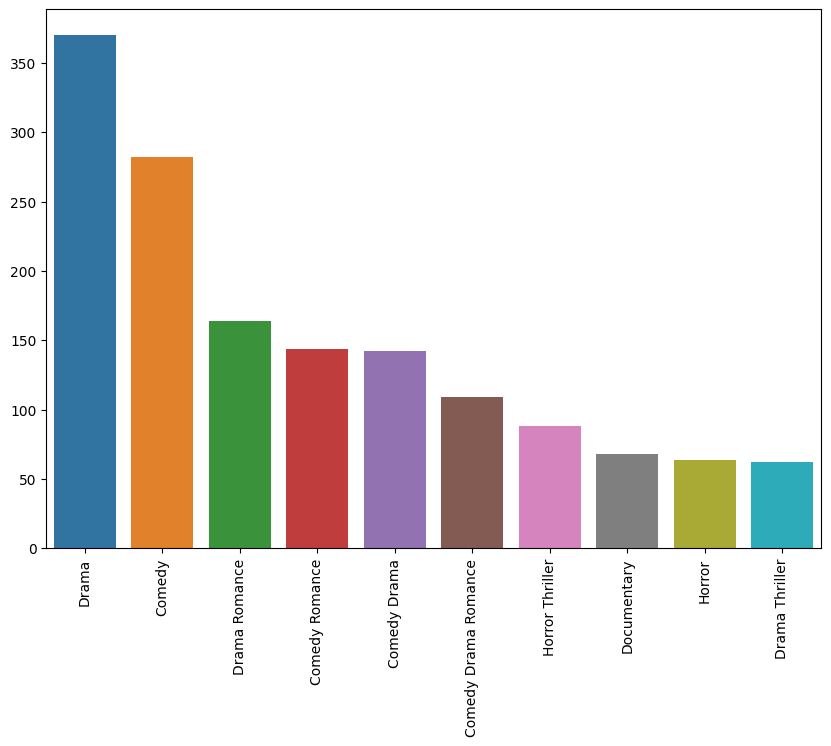

In [266]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,
            x=top10genres.index,
            y=top10genres.values)
plt.show()

# **Building A Recommendation System**

**We will select the related features with recommendation**

In [267]:
selected_features = ['genres','keywords','tagline','cast','director']

In [268]:
# replacing the null valuess with null string

for feature in selected_features:
  df[feature] = df[feature].fillna('')

In [269]:
# combining our selected features togather

combined_features = df['genres']+' '+df['keywords']+' '+df['tagline'] + df['director'] +df['cast']
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in ShanghaiDaniel HsiaDaniel He...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


**Vectorizing our textual data**

In [270]:
vectorizer = TfidfVectorizer()

In [271]:
vector = vectorizer.fit_transform(combined_features)

In [272]:
print(vector)

  (0, 15779)	0.2095055394118743
  (0, 12456)	0.1610633234094777
  (0, 10588)	0.2332742910362637
  (0, 17757)	0.15300583265650794
  (0, 20170)	0.19266427005821646
  (0, 17069)	0.21796473096963118
  (0, 16152)	0.21141722087002185
  (0, 21001)	0.20137539174487637
  (0, 20651)	0.22956022835674036
  (0, 2874)	0.2769884313687475
  (0, 9386)	0.11485590846805264
  (0, 13971)	0.26420286494586487
  (0, 13606)	0.08786259165622992
  (0, 20635)	0.12511748124718536
  (0, 18525)	0.06889560084179573
  (0, 5875)	0.2332742910362637
  (0, 17340)	0.20770315819049848
  (0, 3817)	0.24234579477962298
  (0, 20054)	0.12219340284409327
  (0, 17480)	0.33066210774196875
  (0, 6987)	0.16228411148005978
  (0, 3620)	0.21562787785578993
  (0, 4393)	0.20770315819049848
  (0, 6444)	0.10062857839097201
  (0, 16507)	0.10062857839097201
  :	:
  (4801, 15971)	0.3028550847516525
  (4801, 20971)	0.3028550847516525
  (4801, 5744)	0.263144316882539
  (4801, 434)	0.19004626702126057
  (4801, 8354)	0.3028550847516525
  (4801, 14

**Applying Cosine Similarity**

In [273]:
similarity = cosine_similarity(vector)

**Now, The user will input his favourite movie, and according to his answer the recommendation system will run.**

In [275]:
favourite_movie= input('Please, Enter Your Favourite Movie : ')

Please, Enter Your Favourite Movie : the godfather


**To can match the entred movie by the user and our dataset, we will make a list of our movies.**

In [276]:
movie_list = df['title'].tolist()
print(movie_list)


['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

 **finding the close match for the movie name entred by the user**

In [277]:
find_close_match = difflib.get_close_matches(favourite_movie , movie_list)
print(find_close_match)

['The Godfather', 'The Last Godfather', 'The Watcher']


**I meant (The Godfather) so lets adopt it**

In [278]:
close_match = find_close_match[0]
print(close_match)

The Godfather


**We have done these previous steps in case there are spelling errors, so the value closest to the user's answer is adopted.**

In [279]:
# finding the index of the movie with title

movie_index = df[df.title == close_match]['index'].values[0]
print(movie_index)

3337


In [280]:
df[df['index'] == 3337]

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
3337,3337,6000000,Drama Crime,http://www.thegodfather.com/,238,italy love at first sight loss of father patri...,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,...,175.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An offer you can't refuse.,The Godfather,8.4,5893,Marlon Brando Al Pacino James Caan Richard S. ...,"[{'name': 'Francis Ford Coppola', 'gender': 2,...",Francis Ford Coppola


 **getting a list of similar movies**


In [281]:

similarity_score = list(enumerate(similarity[movie_index]))
print(similarity_score)

[(0, 0.02055048971173232), (1, 0.04709199552849876), (2, 0.017213623055017925), (3, 0.04067982008905074), (4, 0.0), (5, 0.035086473298748935), (6, 0.0), (7, 0.0), (8, 0.008033668594123605), (9, 0.0), (10, 0.014871131512702465), (11, 0.025947734522039946), (12, 0.0), (13, 0.012421603074828038), (14, 0.02874769541856742), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.021435062482056455), (20, 0.050527074689150665), (21, 0.0), (22, 0.02231048223885114), (23, 0.0), (24, 0.010096688242537235), (25, 0.016121077475886494), (26, 0.016337773749606162), (27, 0.022992433115904133), (28, 0.0), (29, 0.0), (30, 0.042217983240856), (31, 0.0), (32, 0.009975085996173251), (33, 0.0), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.0), (40, 0.0), (41, 0.0), (42, 0.0), (43, 0.0), (44, 0.0), (45, 0.01477175321827655), (46, 0.012690210510346472), (47, 0.0), (48, 0.0), (49, 0.009115581743778953), (50, 0.0), (51, 0.0), (52, 0.01869397388365693), (53, 0.03234322240658686), (54, 0.0), (55, 0.

**We dont need all these list, so lets choose the most related movies only.**

In [282]:
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_movies)

[(3337, 1.0000000000000007), (1408, 0.24616268593140037), (867, 0.18614539451766376), (1525, 0.18111430074185866), (2731, 0.1769806526131057), (1874, 0.17300421243602673), (2803, 0.1709405294177481), (3743, 0.17083362754339076), (2649, 0.1374334787298144), (3450, 0.13013406210877423), (1394, 0.12964252190031753), (1061, 0.12807533686598485), (4209, 0.12356195730642058), (4467, 0.11858180612850919), (1225, 0.11699468809170598), (4124, 0.11644012064455976), (1719, 0.11513668290370499), (3696, 0.11298209773114216), (2674, 0.11218180297034046), (4800, 0.11170794461951236), (1167, 0.11165227831585559), (1338, 0.11109544704466275), (2621, 0.110253572384892), (813, 0.1094210597464927), (2108, 0.10933808627809992), (4392, 0.10885969708186298), (2022, 0.10808012340111577), (398, 0.10741270947768523), (1728, 0.10564518532551158), (3352, 0.10322927927860787), (2878, 0.10261958961227483), (4135, 0.10174643576710274), (2260, 0.10173245193317608), (448, 0.10127043310642464), (407, 0.0987527956068977

**Top 10 Recommended Movies ..**

In [283]:
print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df[df.index==index]['title'].values[0]
  if (i<12):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . The Godfather
2 . Closer
3 . The Godfather: Part III
4 . Apocalypse Now
5 . The Godfather: Part II
6 . August Rush
7 . Machete
8 . Leaving Las Vegas
9 . The Son of No One
10 . West Side Story
11 . Donnie Brasco


# **Movie Recommendation System for other movies**

In [285]:
movie_name = input(' Enter your favourite movie name : ')

movie_list = df['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, movie_list)

close_match = find_close_match[0]

movie_index = df[df.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[movie_index]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df[df.index==index]['title'].values[0]
  if (i<12):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite movie name : oldboy
Movies suggested for you : 

1 . Oldboy
2 . Sympathy for Lady Vengeance
3 . The Wailing
4 . The Good, The Bad, The Weird
5 . Dead Man's Shoes
6 . Tidal Wave
7 . Much Ado About Nothing
8 . Kill Bill: Vol. 2
9 . Face/Off
10 . Lucy
11 . Fight Club
